# Bitcoin Price Time Series Analysis

In [1]:
%run -i 'data/bitcoin.py'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
# import data
bitcoin.head()

,High,Low,Last,Bid,Ask,Volume,VWAP
Date,,,,,,,
2014-04-15,515.00,453.16,499.01,500.01,505.04,28535.844106,491.41
2014-04-16,548.00,494.02,534.00,535.01,536.00,31159.941300,520.21
2014-04-17,537.24,481.63,506.52,504.70,505.38,21126.375080,504.83
2014-04-18,508.43,470.00,487.00,484.14,487.00,11879.484756,485.72
2014-04-19,507.43,472.81,504.74,504.74,505.00,10262.195861,492.22


## Univariate Time Series Analysis

In [4]:
uni_data = bitcoin['VWAP']
uni_data.index = bitcoin.index
uni_data.head()

Date
2014-04-15    491.41
2014-04-16    520.21
2014-04-17    504.83
2014-04-18    485.72
2014-04-19    492.22
Name: VWAP, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa20ae6fa00>],
      dtype=object)

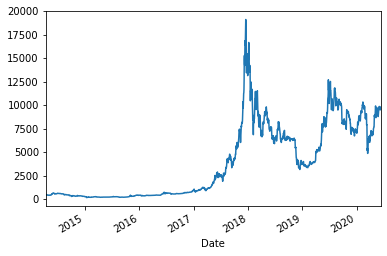

In [5]:
uni_data.plot(subplots=True)

In [6]:
uni_data = uni_data.values
uni_data

array([ 491.41,  520.21,  504.83, ..., 9722.05, 9819.66, 9529.63])

In [7]:
train_split = len(uni_data)-10
uni_train_mean = uni_data[:train_split].mean()
uni_train_std = uni_data[:train_split].std()

uni_data = (uni_data - uni_train_mean) / uni_train_std

In [8]:
import numpy as np
train_data = []
train_labels = []

# set index 
# model will be given 20 bitcoin prices
start_index = 20
end_index = train_split

for i in range(start_index, end_index):
    indices = range(i - 20, i)
    train_data.append(np.reshape(uni_data[indices], (20, 1)))
    train_labels.append(uni_data[i])
    
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [10]:
valid_data = []
valid_labels = []

# set index 
# model will be given 20 bitcoin prices
start_index = train_split

for i in range(start_index, len(uni_data)):
    indices = range(i - 20, i)
    valid_data.append(np.reshape(uni_data[indices], (20, 1)))
    valid_labels.append(uni_data[i])
    
valid_data = np.array(valid_data)
valid_labels = np.array(valid_labels)

In [58]:
model = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=train_data.shape[-2:]),
    keras.layers.LSTM(50),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 20, 100)           40800     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(train_data, train_labels, epochs=20, validation_data = (valid_data, valid_labels))

Epoch 1/20
69/69 [==============================] - 1s 21ms/step - loss: 0.0875 - val_loss: 0.0102
Epoch 2/20
69/69 [==============================] - 1s 15ms/step - loss: 0.0213 - val_loss: 0.0076
Epoch 3/20
69/69 [==============================] - 1s 15ms/step - loss: 0.0151 - val_loss: 0.0036
Epoch 4/20
69/69 [==============================] - 1s 15ms/step - loss: 0.0126 - val_loss: 0.0023
Epoch 5/20
69/69 [==============================] - 1s 15ms/step - loss: 0.0113 - val_loss: 0.0018
Epoch 6/20
69/69 [==============================] - 1s 15ms/step - loss: 0.0113 - val_loss: 0.0030
Epoch 7/20
69/69 [==============================] - 1s 15ms/step - loss: 0.0096 - val_loss: 0.0072
Epoch 8/20
69/69 [==============================] - 1s 15ms/step - loss: 0.0085 - val_loss: 0.0030
Epoch 9/20
69/69 [==============================] - 1s 15ms/step - loss: 0.0077 - val_loss: 0.0020
Epoch 10/20
69/69 [==============================] - 1s 15ms/step - loss: 0.0071 - val_loss: 0.0163
Epoch 11/

In [61]:
predict = model.predict(valid_data)

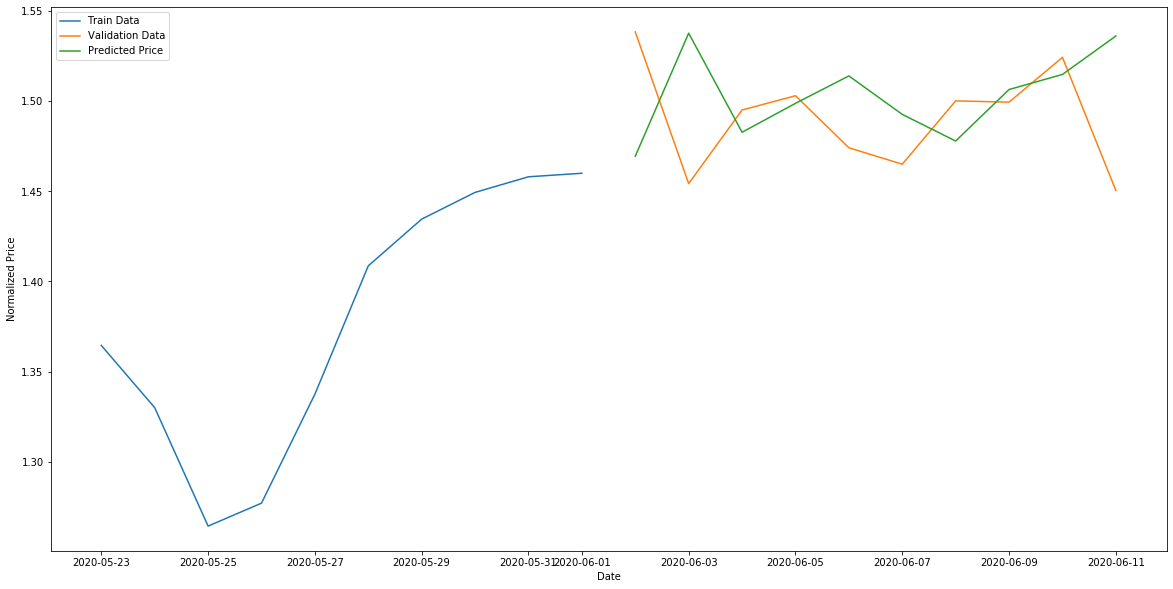

In [63]:
train_date = bitcoin.index[:train_split]
data_train = uni_data[:train_split].tolist()

plt.figure(figsize=(20, 10))
plt.plot(bitcoin.index[-20:-10], uni_data[-20:-10], label="Train Data")
plt.plot(bitcoin.index[-10:], uni_data[-10:], label="Validation Data")
plt.plot(bitcoin.index[-10:], predict, label="Predicted Price")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

## Multivariate Time Series Analysis

In [64]:
# create new time series data
features = bitcoin[['High', 'Low', 'Last', 'Bid', 'Ask', 'VWAP']]
features.index = bitcoin.index
features.head()

,High,Low,Last,Bid,Ask,VWAP
Date,,,,,,
2014-04-15,515.00,453.16,499.01,500.01,505.04,491.41
2014-04-16,548.00,494.02,534.00,535.01,536.00,520.21
2014-04-17,537.24,481.63,506.52,504.70,505.38,504.83
2014-04-18,508.43,470.00,487.00,484.14,487.00,485.72
2014-04-19,507.43,472.81,504.74,504.74,505.00,492.22


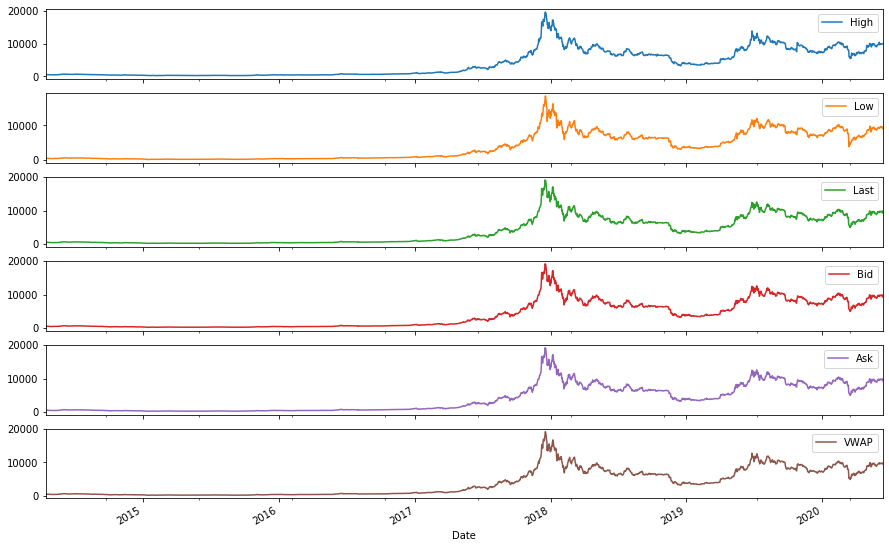

In [65]:
features.plot(subplots=True, figsize=(15, 10))
plt.show()

In [74]:
TRAIN_SPLIT = len(features) - 10
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean()
data_std = dataset[:TRAIN_SPLIT].std()

dataset = (dataset-data_mean) / data_std

In [80]:
data = []
labels = []
target = dataset[:, -1]

# set index 
# model will be given 20 bitcoin prices
start_index = 20
end_index = train_split

for i in range(start_index, end_index):
    indices = range(i - 20, i)
    data.append(dataset[indices])
    labels.append(target[i])
    
train_data = np.array(data)
train_labels = np.array(labels)

In [81]:
valid_data = []
valid_labels = []

# set index 
# model will be given 20 bitcoin prices
start_index = train_split

for i in range(start_index, len(uni_data)):
    indices = range(i - 20, i)
    valid_data.append(dataset[indices])
    valid_labels.append(target[i])
    
valid_data = np.array(valid_data)
valid_labels = np.array(valid_labels)

In [82]:
print(train_data.shape)
print(train_labels.shape)
print(valid_data.shape)
print(valid_labels.shape)

(2194, 20, 6)
(2194,)
(10, 20, 6)
(10,)


In [90]:
model = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape = train_data.shape[-2:]),
    keras.layers.LSTM(50, return_sequences=True),
    keras.layers.LSTM(25),
    keras.layers.Dense(1)
])

callback = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [91]:
history = model.fit(train_data, train_labels, epochs=100, 
                    validation_data=(valid_data, valid_labels), callbacks=[callback])

Epoch 1/100
69/69 [==============================] - 2s 31ms/step - loss: 0.1537 - val_loss: 0.3765
Epoch 2/100
69/69 [==============================] - 1s 21ms/step - loss: 0.1072 - val_loss: 0.2460
Epoch 3/100
69/69 [==============================] - 1s 21ms/step - loss: 0.0917 - val_loss: 0.1758
Epoch 4/100
69/69 [==============================] - 1s 21ms/step - loss: 0.0797 - val_loss: 0.0615
Epoch 5/100
69/69 [==============================] - 1s 21ms/step - loss: 0.0757 - val_loss: 0.0995
Epoch 6/100
69/69 [==============================] - 1s 21ms/step - loss: 0.0685 - val_loss: 0.1242
Epoch 7/100
69/69 [==============================] - 1s 21ms/step - loss: 0.0648 - val_loss: 0.0725
Epoch 8/100
69/69 [==============================] - 1s 21ms/step - loss: 0.0604 - val_loss: 0.0415
Epoch 9/100
69/69 [==============================] - 1s 21ms/step - loss: 0.0579 - val_loss: 0.0269
Epoch 10/100
69/69 [==============================] - 1s 21ms/step - loss: 0.0568 - val_loss: 0.0852

In [92]:
predict = model.predict(valid_data)

In [100]:
vwap = []

for val in range(len(dataset)):
    vwap.append(dataset[val][-1])

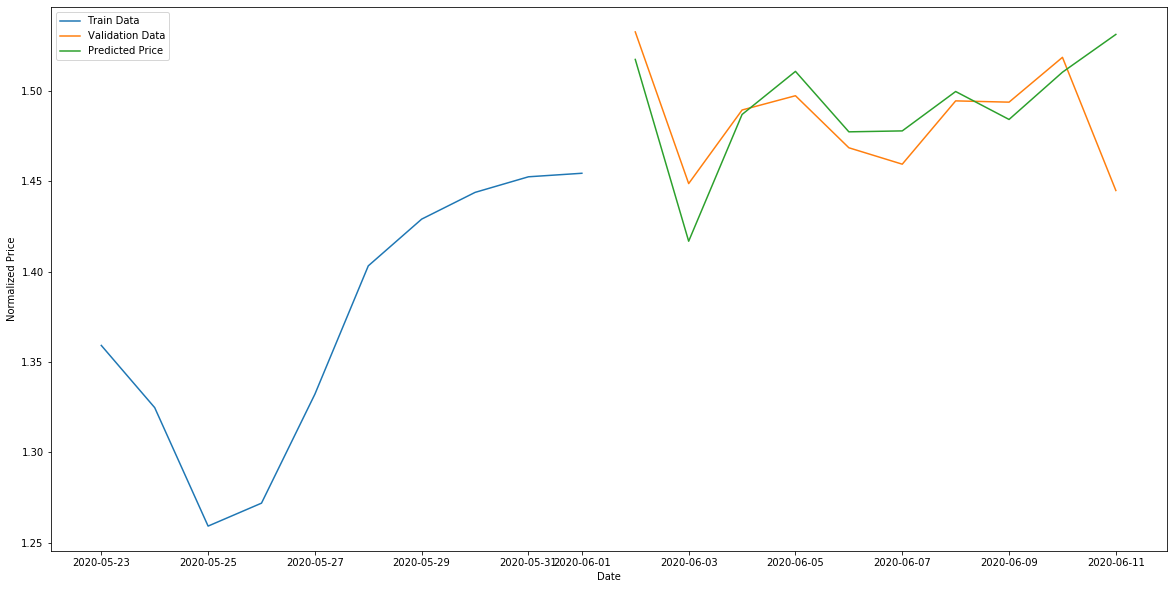

In [102]:
train_date = bitcoin.index[:train_split]
data_train = uni_data[:train_split].tolist()

plt.figure(figsize=(20, 10))
plt.plot(bitcoin.index[-20:-10], vwap[-20:-10], label="Train Data")
plt.plot(bitcoin.index[-10:], vwap[-10:], label="Validation Data")
plt.plot(bitcoin.index[-10:], predict, label="Predicted Price")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()